<a href="https://colab.research.google.com/github/anagjurchinova/DataScience_2025/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [ ]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

Downloading...
From: https://drive.google.com/uc?id=1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS
To: /content/diabetes.csv
100% 23.8k/23.8k [00:00<00:00, 59.2MB/s]


In [ ]:
import pandas as pd

data = pd.read_csv('/content/diabetes.csv')

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [ ]:
data.isnull().mean() * 100

,0
Pregnancies,1.822917
Glucose,0.000000
BloodPressure,0.000000
SkinThickness,1.041667
Insulin,0.000000
BMI,1.302083
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

<Axes: >

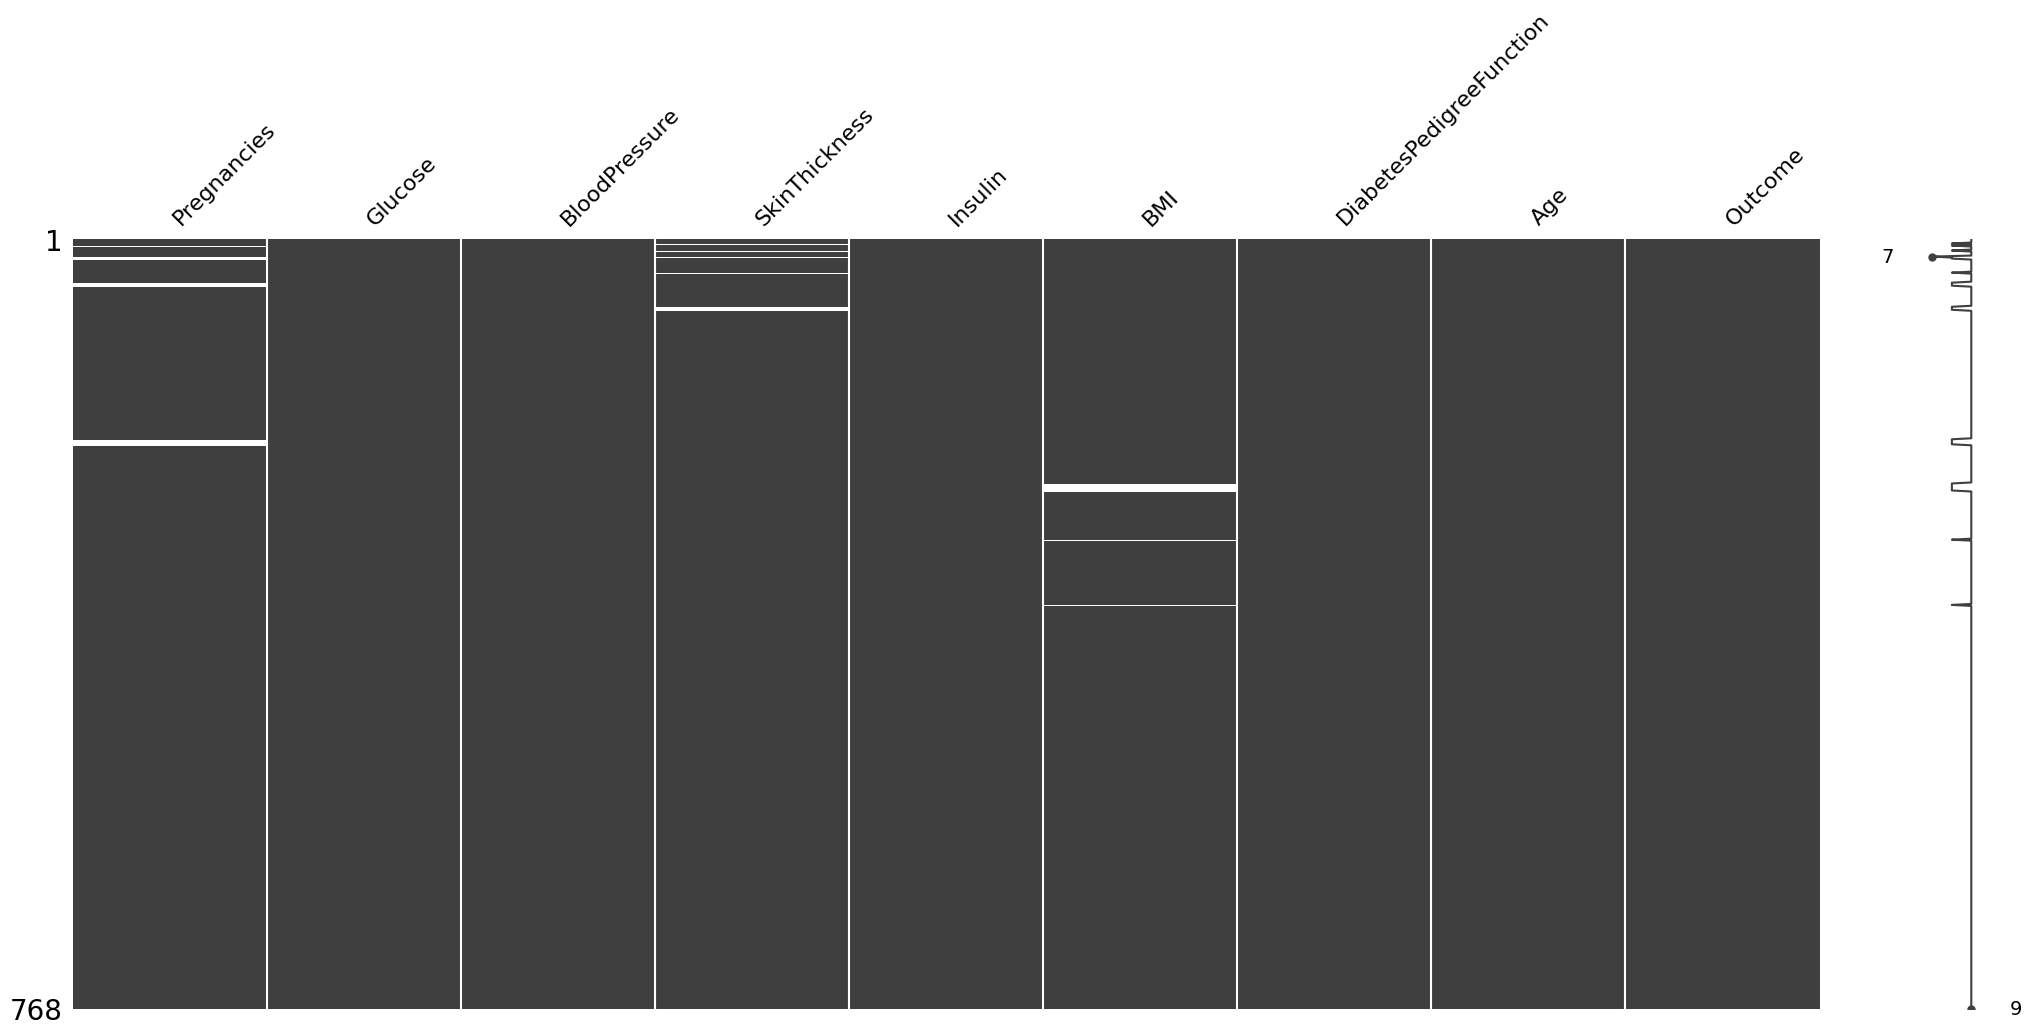

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

msno.matrix(data)

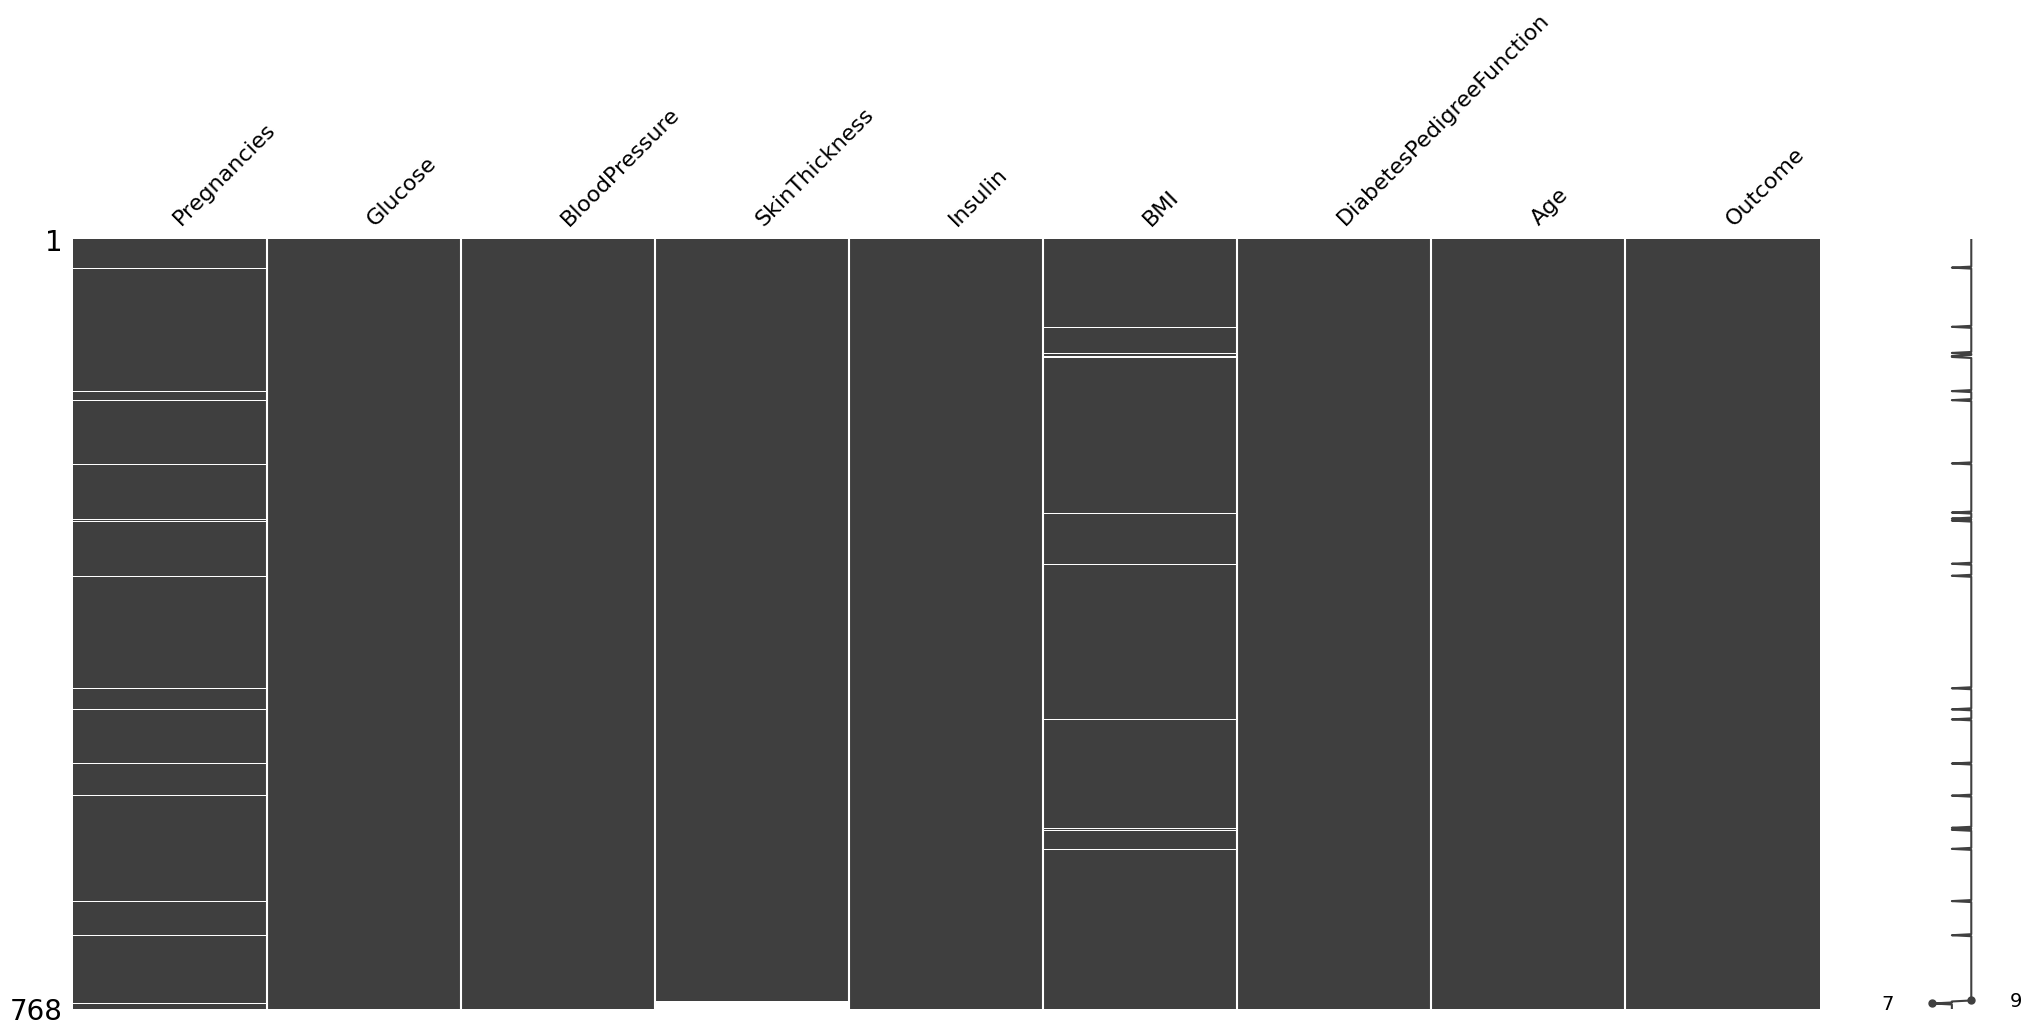

In [ ]:
msno.matrix(data.sort_values('SkinThickness'))
plt.show()

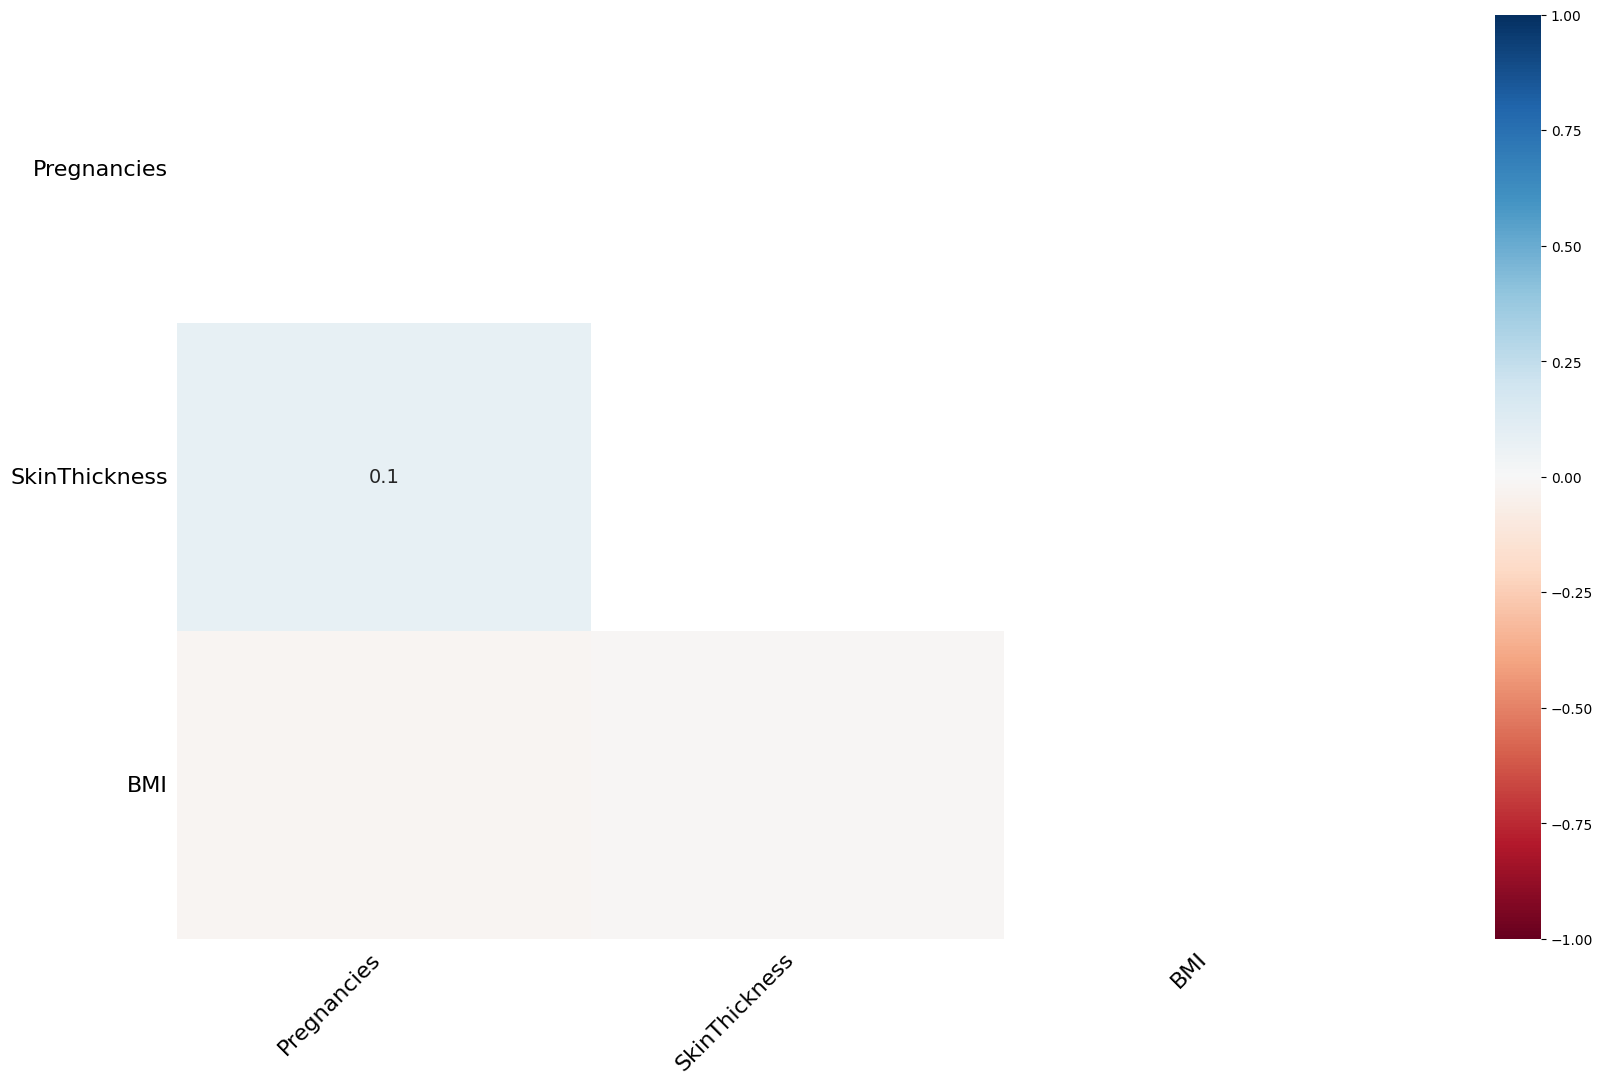

In [ ]:
msno.heatmap(data)
plt.show()

# The features are not correlated.

## <font color = 'Orange'>Handle the missing values</font>

In [ ]:
data.isnull().mean() * 100

,0
Pregnancies,1.822917
Glucose,0.000000
BloodPressure,0.000000
SkinThickness,1.041667
Insulin,0.000000
BMI,1.302083
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


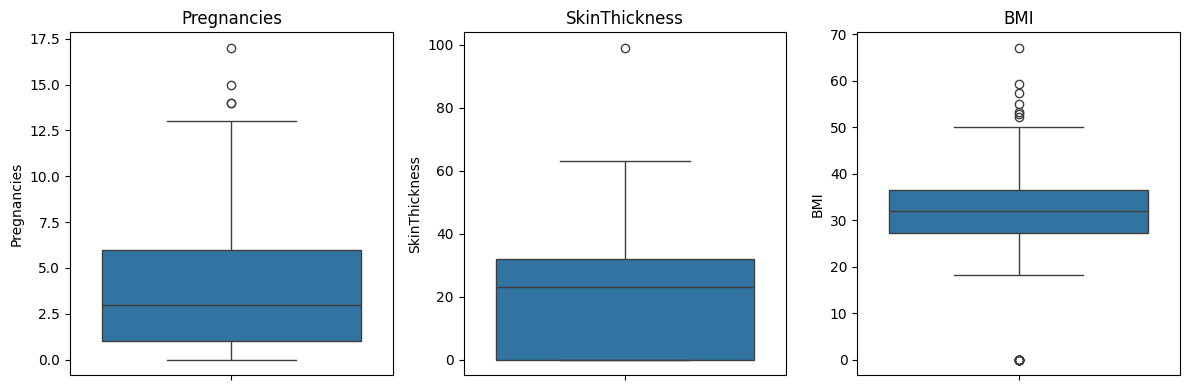

In [ ]:
nf_missing = ['Pregnancies', 'SkinThickness', 'BMI']
plt.figure(figsize=(12,4))
for i in range(len(nf_missing)):
  plt.subplot(1,3,i+1)
  sns.boxplot(y = nf_missing[i], data=data)
  plt.title(nf_missing[i])

plt.tight_layout()

In [ ]:
data[data['BMI']>=50]['BMI']

,BMI
120,53.2
125,55.0
155,50.0
177,67.1
193,52.3
303,52.9
445,59.4
673,57.3


In [ ]:
# We will drop the rows with missing values because even then we are going to lose around 3% of data, which is not bad and plus we are not going to impute artificial data.

data.dropna(subset=['BMI', 'SkinThickness', 'Pregnancies'], axis=0, inplace=True)
data.isnull().mean() * 100

,0
Pregnancies,0.0
Glucose,0.0
BloodPressure,0.0
SkinThickness,0.0
Insulin,0.0
BMI,0.0
DiabetesPedigreeFunction,0.0
Age,0.0
Outcome,0.0


## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [ ]:
data.to_csv('data_new.csv', index=False)

Print the first rows of your final Dataset

In [ ]:
data_new = pd.read_csv('/content/data_new.csv')
data_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[:-1]],  data['Outcome'], test_size=0.2)

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# We need to scale the values, to bring them to a normal distribution because our model works with normally distributed data
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

model_accuracies = dict()

for i in range(1,10,2):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, Y_train)
  model_accuracies[i] = model.score(X_test, Y_test)

In [ ]:
model_accuracies

{1: 0.668918918918919,
 3: 0.6756756756756757,
 5: 0.7027027027027027,
 7: 0.6959459459459459,
 9: 0.6959459459459459}

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)

KNeighborsClassifier()

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [ ]:
predictions = model.predict(X_test)
predictions

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

# The f1-score suggests that our dataset might not be balanced, and we might have more negative target classes in our records,
# so the model learns to predict them better. If we balance out the dataset we might get better results.

[[72 18]
 [26 32]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.77        90
           1       0.64      0.55      0.59        58

    accuracy                           0.70       148
   macro avg       0.69      0.68      0.68       148
weighted avg       0.70      0.70      0.70       148



In [ ]:
data['Outcome'].value_counts()
# The dataset is not balanced.

,count
Outcome,
0,474
1,263
